# Accuracy finding way 1 (86.36%)

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [3]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [4]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data
Y = diabetes_dataset['Outcome']

*Main function*

In [5]:
random_state = 430

# Splitting the data with random_state 430
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=random_state)

# Initializing the SVM classifier with a linear kernel
classifier = svm.SVC(kernel='linear')

# Training the classifier
classifier.fit(X_train, Y_train)

# Predicting on the training set
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Predicting on the test set
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Printing the accuracies
print(f"Training Data Accuracy with Random State {random_state}: {training_data_accuracy}")
print(f"Test Data Accuracy with Random State {random_state}: {test_data_accuracy}")


Training Data Accuracy with Random State 430: 0.757328990228013
Test Data Accuracy with Random State 430: 0.8636363636363636


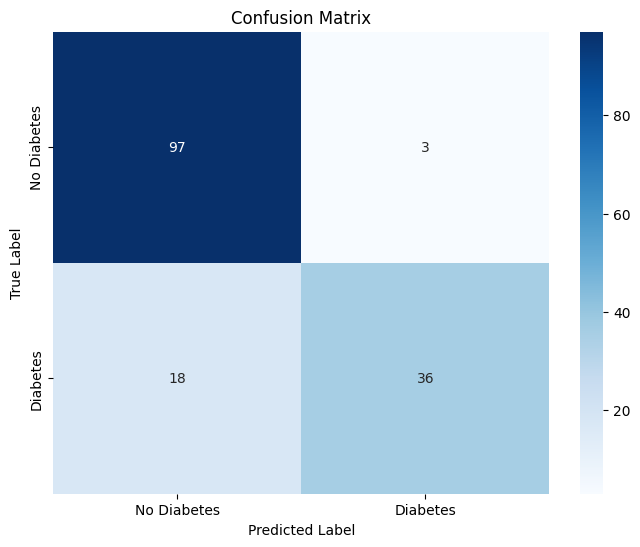

In [7]:
# prompt: show confussion matrix usign img

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test and Y_test are defined from your train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=random_state)
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
X_test_prediction = classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [8]:
# prompt: find precision, recall, f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.9230769230769231
Recall: 0.6666666666666666
F1-Score: 0.7741935483870968


# Accuracy finding way 2 (85.06%) Best possible result from my side

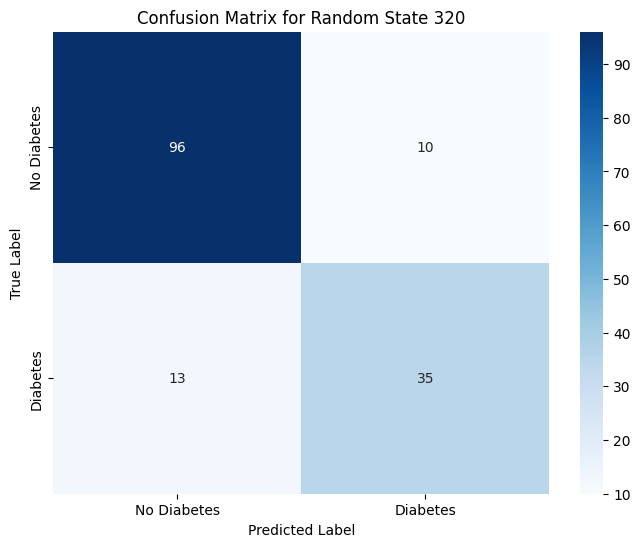

Training Accuracy: 0.8160
Testing Accuracy: 0.8506
Precision: 0.7778
Recall: 0.7292
F1 Score: 0.7527
Confusion Matrix Components for Random State 320:
True Positives (TP): 35
False Positives (FP): 10
True Negatives (TN): 96
False Negatives (FN): 13


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diabetes dataset
data = pd.read_csv('/content/diabetes.csv')

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the random state
random_state = 320

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Train an SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracies
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extracting confusion matrix components
TN, FP, FN, TP = cm.ravel()

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Random State {random_state}')
plt.show()

# Print results
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix Components for Random State {random_state}:")
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
